<a href="https://colab.research.google.com/github/HakujouRyu/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Copy_of_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

## Part one
#### Replicate


In [16]:
#Merge data
merged = pd.merge(income,lifespan)
merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [17]:
merged.duplicated(subset=['geo','time']).value_counts()

False    40437
dtype: int64

In [0]:
df = pd.merge(merged, population)

In [19]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [20]:
#Drop the columns we don't need from entities when we merge
df = pd.merge(df, 
              entities[['country', 'name', 'world_4region', 'world_6region']], 
              left_on='geo', right_on='country')
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [22]:
df.shape

(40437, 9)

In [23]:
df = df.rename(columns= {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region'})

df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [24]:
#Explore
df.dtypes

geo              object
year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object

In [25]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [26]:
df.describe(exclude='number')

,geo,country_code,country,4region,6region
count,40437,40437,40437,40437,40437
unique,187,187,187,4,6
top,mda,mda,Thailand,africa,europe_central_asia
freq,219,219,219,11826,10778


In [27]:
usa = df[df.country == 'United States']
usa.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
38028,usa,1800,2127,39.41,6801854,usa,United States,americas,america
38029,usa,1801,2167,39.41,6933517,usa,United States,americas,america
38030,usa,1802,2202,39.41,7067728,usa,United States,americas,america
38031,usa,1803,2166,39.41,7204538,usa,United States,americas,america
38032,usa,1804,2165,39.41,7343995,usa,United States,americas,america


In [28]:
usa.describe()

,year,income,lifespan,population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,14572.936073,54.846256,1.163662e+08
std,63.364028,15066.042247,15.202079,9.738644e+07
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1854.500000,3512.500000,39.410000,2.752198e+07
50%,1909.000000,7989.000000,51.780000,9.236198e+07
75%,1963.500000,20090.500000,70.270000,1.962540e+08
max,2018.000000,54898.000000,79.140000,3.267667e+08


In [29]:
usa[usa.year.isin([1818,1918,2018])]

,geo,year,income,lifespan,population,country_code,country,4region,6region
38046,usa,1818,2258,39.41,9879049,usa,United States,americas,america
38146,usa,1918,9371,47.18,106721812,usa,United States,americas,america
38246,usa,2018,54898,79.14,326766748,usa,United States,americas,america


In [32]:
china = df[df.country=='China']
china[china.year.isin([1818,1918,2018])]

,geo,year,income,lifespan,population,country_code,country,4region,6region
6854,chn,1818,985,32.00,374161494,chn,China,asia,east_asia_pacific
6954,chn,1918,989,22.13,462444535,chn,China,asia,east_asia_pacific
7054,chn,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


In [33]:
#Plot time
import seaborn as sns

now = df[df.year == 2018]
then = df[df.year == 1918]
now.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,americas,america


(483.5453734847516, 100000)

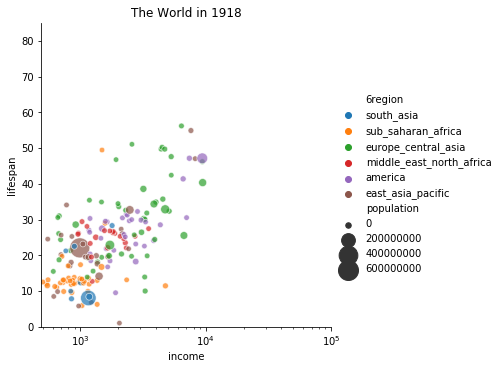

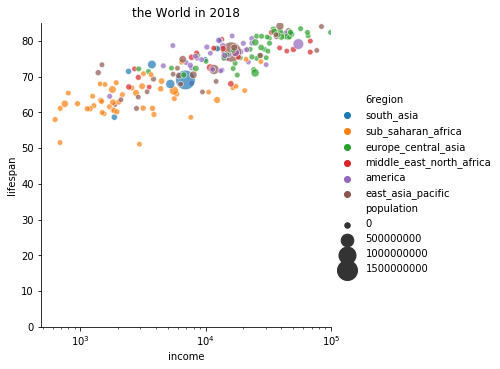

In [37]:
sns.relplot(x='income', y='lifespan',hue='6region', size='population',
            sizes=(30, 400), alpha=0.7, data=then)
plt.xscale('log')
plt.title('The World in 1918')
plt.ylim(0,85)
plt.xlim(483.5453734847516,100000)


sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=now)
plt.xscale('log')
plt.title("the World in 2018")
plt.ylim(0,85)
plt.xlim(483.5453734847516,100000)

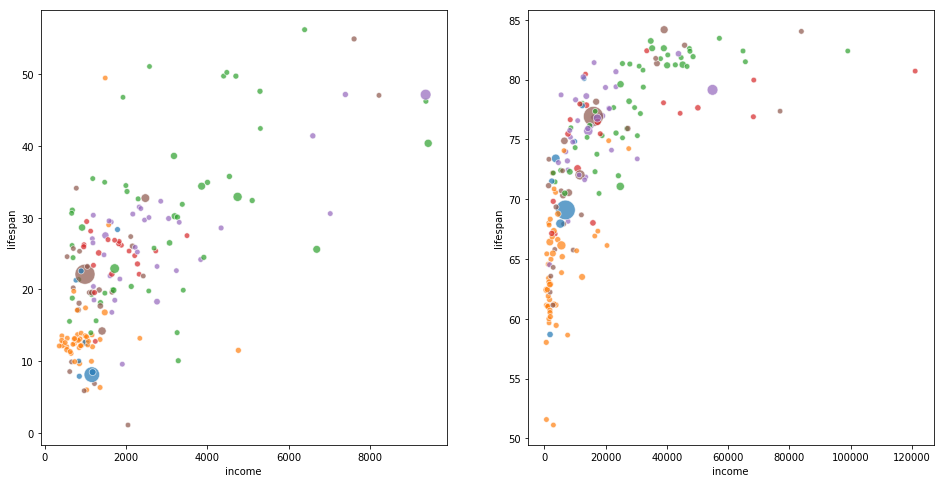

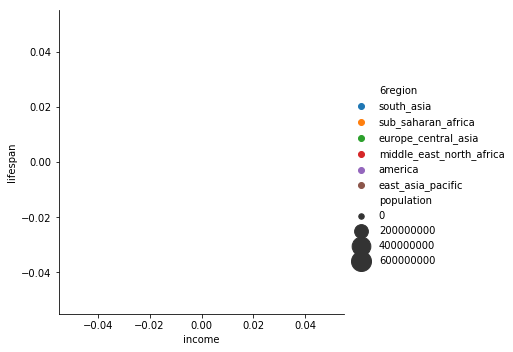

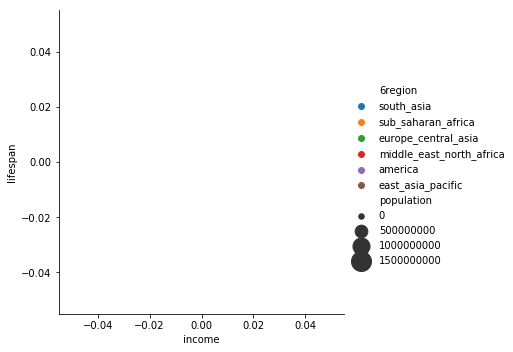

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=then, ax=ax[0]);

sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
                        sizes=(30, 400), alpha=0.7, data=now, ax=ax[1]);

In [40]:
now.income.nlargest(20)

30362    121033
22212     99034
31895     83888
5521      76943
20241     68359
922       68231
16956     65622
27296     64846
6616      57133
38246     54898
31238     50114
27077     48542
34304     47520
17613     47356
10167     46583
1798      45783
9682      45166
2017      44645
3769      44330
6397      43773
Name: income, dtype: int64

In [41]:
now_qatar = now[now.country=='Qatar']
now_qatar.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


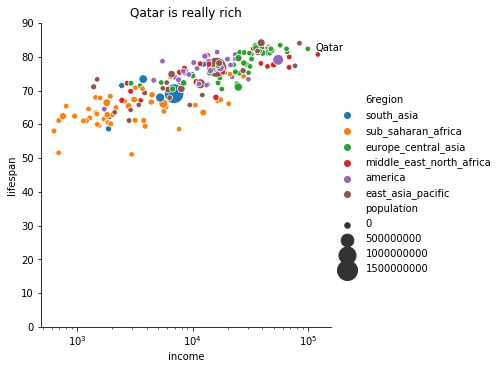

In [43]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(0,90)
plt.title("Qatar is really rich")
plt.text(x=now_qatar.income-5000, y= now_qatar.lifespan+1, s='Qatar')
plt.show()

In [44]:
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

centuries.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
18,afg,1818,604,28.03,3308390,afg,Afghanistan,asia,south_asia
118,afg,1918,849,7.89,5704092,afg,Afghanistan,asia,south_asia
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
237,ago,1818,668,26.98,1586896,ago,Angola,africa,sub_saharan_africa
337,ago,1918,1174,12.01,3487015,ago,Angola,africa,sub_saharan_africa


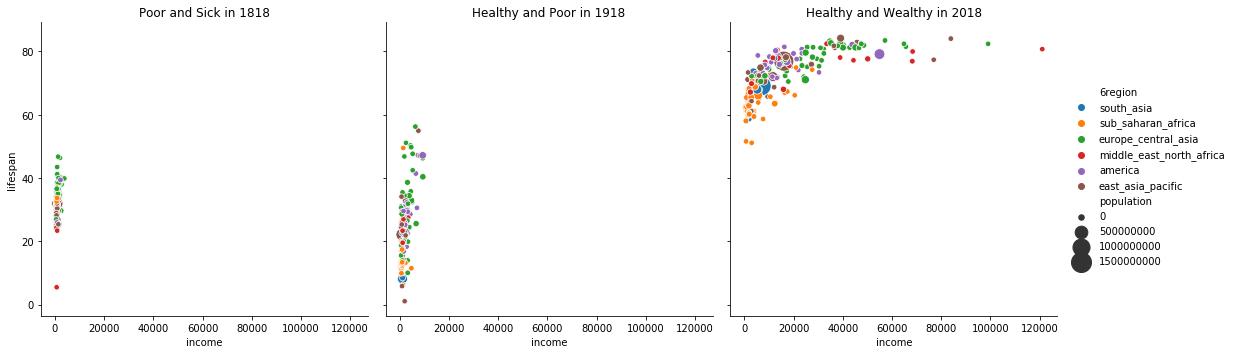

In [45]:
fig = sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
                  sizes=(30,400), col='year', data=centuries)

axes = fig.axes.flatten()
axes[0].set_title('Poor and Sick in 1818')
axes[1].set_title('Healthy and Poor in 1918')
axes[2].set_title('Healthy and Wealthy in 2018');

In [0]:
years = [1918, 1938, 1978, 1998, 2018]

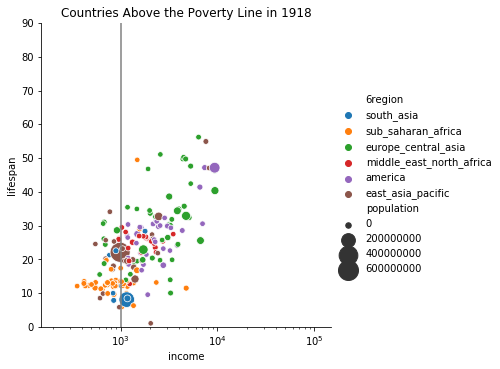

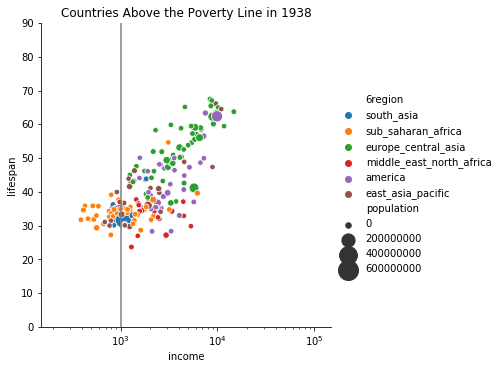

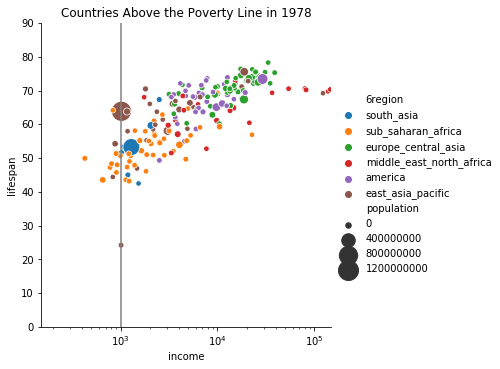

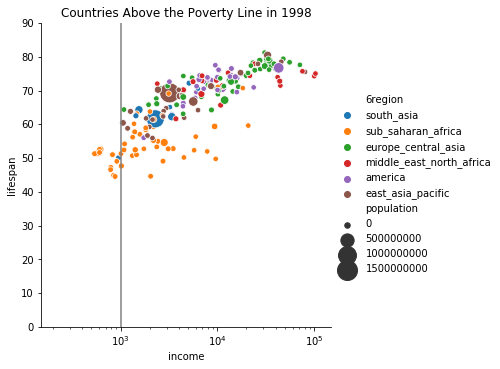

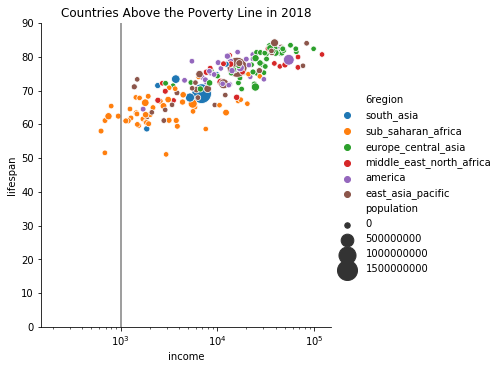

In [47]:
for year in years:
  sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
              sizes=(30,400), data=df[df.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title('Countries Above the Poverty Line in ' + str(year))
  plt.axvline(x=1000, color='grey')

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [7]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [8]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [9]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [10]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [11]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [12]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Part Two

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [66]:
income.shape, lifespan.shape, population.shape, entities.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33))

In [58]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [59]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [60]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [96]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [92]:
entities.shape

(273, 33)

In [93]:
entities.main_religion_2008.isna().sum()

57

In [0]:
entities = entities[~entities['main_religion_2008'].isna()]

In [99]:
entities.shape

(216, 33)

In [100]:
merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [108]:
final = pd.merge(merged, entities[['country', 'main_religion_2008']], how='inner', left_on='geo', right_on='country')
final.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,country,main_religion_2008
0,afg,1800,603,28.21,afg,muslim
1,afg,1801,603,28.20,afg,muslim
2,afg,1802,603,28.19,afg,muslim
3,afg,1803,603,28.18,afg,muslim
4,afg,1804,603,28.17,afg,muslim


In [0]:
final = pd.merge(final, population)

In [0]:
final = final.rename(columns={'income_per_person_gdppercapita_ppp_inflation_adjusted': 'avg_income/person'})

In [137]:
final.isna().sum()

geo                      0
time                     0
avg_income/person        0
life_expectancy_years    0
country                  0
main_religion_2008       0
population_total         0
dtype: int64

In [138]:
final[final['time']==1800].head()

,geo,time,avg_income/person,life_expectancy_years,country,main_religion_2008,population_total
0,afg,1800,603,28.21,afg,muslim,3280000
219,ago,1800,618,26.98,ago,christian,1567028
438,alb,1800,667,35.40,alb,muslim,410445
704,are,1800,998,30.70,are,muslim,40153
923,arg,1800,1507,33.20,arg,christian,534000


In [206]:
brush = alt.selection(type='interval')
base = alt.Chart(final[final['time']==1800]).mark_point().encode(
    y='life_expectancy_years',
    x='avg_income/person',
    size='population_total',
    tooltip=['geo', 'avg_income/person', 'main_religion_2008', 'population_total'],
    color=alt.condition(brush, 'main_religion_2008', alt.ColorValue('gray'))
).add_selection(brush).properties(width=400,height=400)
base.encode(x='avg_income/person')

alt.Chart(...)

In [167]:
brush = alt.selection(type='interval')
base = alt.Chart(final[final['time']==1900]).mark_point().encode(
    y='life_expectancy_years',
    x='avg_income/person',
    size='population_total',
    tooltip=['geo', 'avg_income/person', 'main_religion_2008', 'population_total'],
    color=alt.condition(brush, 'main_religion_2008', alt.ColorValue('gray'))
).add_selection(brush).properties(width=400,height=400)
base.encode(x='avg_income/person')

alt.Chart(...)

In [222]:
brush = alt.selection(type='interval')
base = alt.Chart(final[final['time']==2000]).mark_point().encode(
    alt.X('avg_income/person:Q', scale=alt.Scale(type='log')),
    alt.Y('life_expectancy_years:Q', scale=alt.Scale(zero=False)),
    size='population_total',
    tooltip=['geo', 'avg_income/person', 'main_religion_2008', 'population_total'],
    color=alt.condition(brush, 'main_religion_2008', alt.ColorValue('gray')),
).add_selection(brush).properties(width=400,height=400)
base.encode(x='avg_income/person')

alt.Chart(...)

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO